# Advanced Network Management - Assignment 1

## Tasks

#### 1) Calculate the average SRT of every 10 minutes, and plot the SRT with a line chart (x axis for date time and y axis for the average SRT).

#### 2) Calculate the average of each SRT component of every 10 minute, and plot the four SRT components together with a stacked area chart (x axis for date time and y axis for time) and also a 100% stacked area chart (y axis for the percentage).

#### 3) Plot the CDF (Cumulative distribution function) chart of SRT.

#### 4) Plot the CDF chart of #Images.

#### 5) Count the number of queries (also called page views or PVs) of each minute, and plot the minute-level PVs with a line chart (x axis for date time and y axis for the PVs).

#### 6) Count the PVs of each province, and plot it with a histogram chart (x axis for province and y axis for PVs).

#### 7) Count the PVs of each UA, and plot it with a pie chart (show the percentages in the chart).

#### 8) What are the differences among those charts (How to decide which one to use)

#### 9) Describe your experience or findings in doing those jobs. For example, experience of processing the data, observations from the charts, characteristics of the data, potential explanations, and any interesting things you would like to mention.

## Dataset

####  [Dropbox](https://www.dropbox.com/s/akef557hnla0h9v/ANM-data.zip?dl=0) / [Tsinghua Cloud](https://cloud.tsinghua.edu.cn/f/c8806b4c81ee45afa03c/?dl=1)

### Preliminary preparations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import glob, os

csv_files = glob.glob("dataset/*.csv")

def sort_file_name(filename):
    return int(os.path.basename(filename)[:-4])

csv_files.sort(key=sort_file_name)

dataset = []
for file in csv_files:
    content = pd.read_csv(file)
    dataset.append(content)
dataset = pd.concat(dataset, axis=0, ignore_index=True)

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961926 entries, 0 to 4961925
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  int64  
 1   #Images    int64  
 2   UA         object 
 3   Ad         object 
 4   ISP        object 
 5   Province   object 
 6   PageType   object 
 7   Tnet       float64
 8   Tserver    float64
 9   Tbrowser   float64
 10  Tother     float64
 11  SRT        float64
dtypes: float64(5), int64(2), object(5)
memory usage: 454.3+ MB


In [3]:
dataset.head()

,Timestamp,#Images,UA,Ad,ISP,Province,PageType,Tnet,Tserver,Tbrowser,Tother,SRT
0,1411315200,37,MSIE 8+,noAD,CHINANET,Zhejiang,async,371.0,97.0,251.0,223.0,942.0
1,1411315200,12,MSIE 8+,noAD,CHINANET,Zhejiang,async,67.0,506.0,155.0,257.0,985.0
2,1411315200,24,Chrome,noAD,CMNET,Jiangsu,async,90.0,228.0,33.0,799.0,1150.0
3,1411315200,18,MSIE 8+,noAD,OTHER,Beijing,async,30.0,132.0,25.0,46.0,233.0
4,1411315200,13,Chrome,noAD,UNICOM,Beijing,async,29.0,491.0,28.0,46.0,594.0


In [4]:
import datetime as dt

dataset['time'] = pd.to_datetime(dataset['Timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Shanghai')
dataset['date'] = dataset['time'].dt.date
diffs = dataset['time'] - dataset['time'].shift()
intervals = diffs > pd.Timedelta('1min')
periods = intervals.cumsum().apply(lambda x: '{}'.format(x))
dataset['period'] = periods
dataset.tail()

,Timestamp,#Images,UA,Ad,ISP,Province,PageType,Tnet,Tserver,Tbrowser,Tother,SRT,time,date,period
4961921,1412524735,25,Chrome,noAD,CHINANET,Guangxi,async,97.0,108.0,28.0,159.0,392.0,2014-10-05 23:58:55+08:00,2014-10-05,13
4961922,1412524735,0,Chrome,noAD,CHINANET,Heibei,async,39.0,634.0,14.0,0.0,687.0,2014-10-05 23:58:55+08:00,2014-10-05,13
4961923,1412524737,12,Chrome,noAD,CHINANET,Xinjiang,async,193.0,603.0,46.0,234.0,1076.0,2014-10-05 23:58:57+08:00,2014-10-05,13
4961924,1412524737,8,Chrome,noAD,UNICOM,Liaoning,async,75.0,187.0,29.0,54.0,345.0,2014-10-05 23:58:57+08:00,2014-10-05,13
4961925,1412524738,12,MSIE 8+,noAD,CNCGROUP,Shanxi,async,114.0,190.0,52.0,378.0,734.0,2014-10-05 23:58:58+08:00,2014-10-05,13


In [5]:
d = dataset.copy()
start_time= d.iloc[0]['Timestamp']
time_diff = d['Timestamp'] - start_time
d['period'] = time_diff// 600


temp = d.groupby(['period'])[["Timestamp", "Tnet", "Tbrowser", "Tserver", "Tother", "SRT"]].mean()
temp['time'] = pd.to_datetime(temp['Timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Shanghai')
temp['date'] = temp['time'].dt.date

# d['period'] = (d['time'].dt.hour*60 + d['time'].dt.minute) //10
# startDate = d.iloc[0]['time']
# timeDiff = d['time'] - startDate




In [6]:
temp

,Timestamp,Tnet,Tbrowser,Tserver,Tother,SRT,time,date
period,,,,,,,,
0,1.411315e+09,240.866494,113.980551,231.211210,320.478120,906.536375,2014-09-22 00:04:55.923284769+08:00,2014-09-22
1,1.411316e+09,234.484759,107.037701,227.134765,326.986403,895.643628,2014-09-22 00:14:51.512979031+08:00,2014-09-22
2,1.411317e+09,207.013556,116.294969,227.753990,325.405238,876.467753,2014-09-22 00:24:51.640248060+08:00,2014-09-22
3,1.411317e+09,223.563776,110.717230,223.181509,335.168178,892.630692,2014-09-22 00:34:53.536685944+08:00,2014-09-22
4,1.411318e+09,236.600108,110.222422,225.313283,302.815247,874.951058,2014-09-22 00:44:50.835874557+08:00,2014-09-22
...,...,...,...,...,...,...,...,...
2011,1.412522e+09,229.920329,85.918161,230.923232,392.441704,939.203427,2014-10-05 23:14:56.562780380+08:00,2014-10-05
2012,1.412523e+09,233.887532,90.022400,228.578472,380.334800,932.823204,2014-10-05 23:24:57.691999912+08:00,2014-10-05
2013,1.412523e+09,224.649388,91.997483,224.712534,391.881711,933.241116,2014-10-05 23:34:57.609479904+08:00,2014-10-05


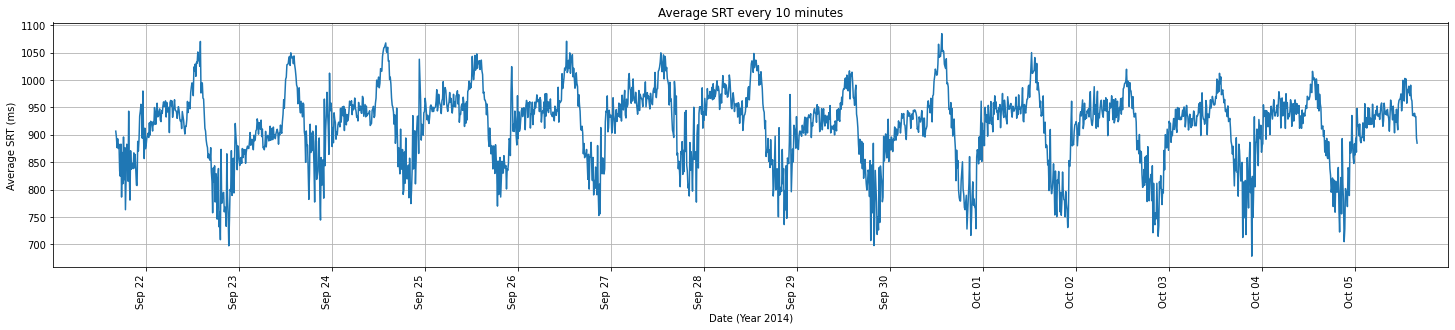

In [7]:
%matplotlib inline
import matplotlib.dates as mdates

def get_dates():
    start = dt.date(2014, 9, 22)
    end = dt.date(2014, 10, 5)
    dates = []
    
    time_diff = end - start
    for i in range(time_diff.days + 1):
        new_date = start + dt.timedelta(days=i)
        dates.append(new_date)
    return dates

ax = temp.plot(x='time', y='SRT', kind='line', legend=False, title="Average SRT every 10 minutes", figsize= (25, 5))
ax.set_xlabel("Date (Year 2014)")
ax.set_ylabel("Average SRT (ms)")
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlim(pd.Timestamp('2014-09-21'), pd.Timestamp('2014-10-06'))

dates = get_dates()
plt.xticks(dates, rotation = 90)
ax.grid(True)


plt.show()

fig = ax.get_figure()
fig.savefig("figure_1", dpi=300)

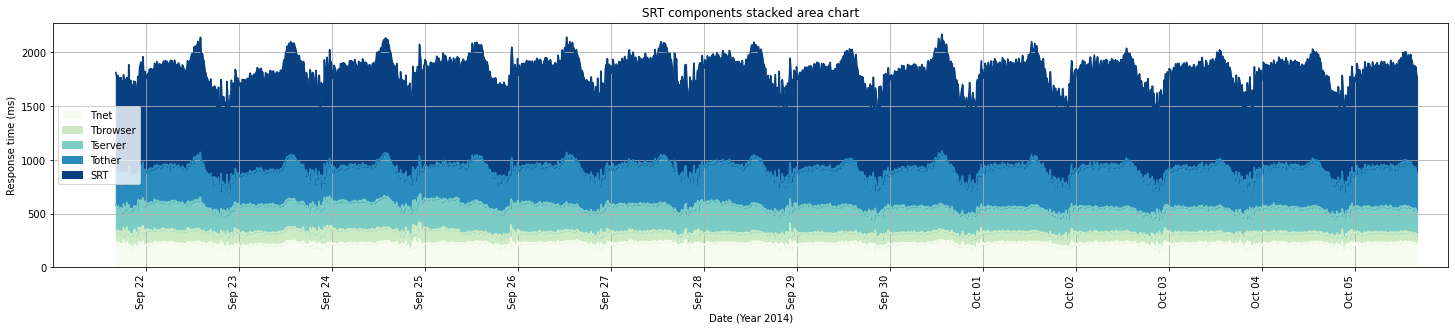

In [8]:
ax = temp.plot.area(x='time', y=["Tnet", "Tbrowser", "Tserver", "Tother", "SRT"],title="SRT components stacked area chart", colormap="GnBu", figsize= (25, 5))
ax.set_xlabel("Date (Year 2014)")
ax.set_ylabel("Response time (ms)")
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlim(pd.Timestamp('2014-09-21'), pd.Timestamp('2014-10-06'))

dates = get_dates()
plt.xticks(dates, rotation = 90)
ax.grid(True)


plt.show()

fig = ax.get_figure()
fig.savefig("figure_2", dpi=300)